<a href="https://colab.research.google.com/github/chaitanyaravi04/Voice-Classification-using-ml/blob/main/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/cleaned_emotion.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,X,meanfreq,sd,median,Q25,Q75,IQR,skew,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0,1,1,0.181338,0.060495,0.187476,0.126197,0.233586,0.107389,0.869088,...,0.181338,0.137742,0.023022,0.271186,0.777344,0.085938,6.226562,6.140625,0.116586,sad
1,1,2,2,0.186897,0.062260,0.195070,0.130847,0.243987,0.113140,1.191767,...,0.186897,0.121811,0.018412,0.271186,0.930339,0.085938,4.000000,3.914062,0.144983,sad
2,2,3,3,0.189102,0.062901,0.204945,0.131422,0.249978,0.118556,1.312690,...,0.189102,0.123758,0.083333,0.262295,0.332386,0.085938,0.625000,0.539062,0.334783,sad
3,4,5,5,0.183036,0.060051,0.174115,0.129949,0.236967,0.107017,1.096409,...,0.183036,0.128469,0.044693,0.258065,1.012019,0.085938,5.468750,5.382812,0.304910,sad
4,5,6,6,0.168793,0.057910,0.156266,0.116783,0.216326,0.099543,1.386837,...,0.168793,0.109720,0.022472,0.235294,0.228795,0.093750,0.750000,0.656250,0.306777,sad


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_curve,auc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
df=df.drop([df.columns[0],df.columns[1],df.columns[2]],axis=1)
df.columns


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [ ]:
df.shape


(909, 21)

In [ ]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,0.206170,0.051275,0.212524,0.177508,0.244574,0.067065,2.095407,8.336008,0.884311,0.298569,0.220830,0.206170,0.166384,0.032167,0.259240,0.791625,0.129787,4.224534,4.094747,0.204235
std,0.023133,0.014841,0.027557,0.038010,0.017223,0.029831,0.614903,3.511599,0.036912,0.134277,0.047916,0.023133,0.032946,0.018036,0.018766,0.318400,0.101413,1.966856,1.958441,0.070437
min,0.138892,0.024114,0.139472,0.046111,0.193367,0.020098,0.681156,2.657216,0.783243,0.074134,0.084523,0.138892,0.074660,0.015640,0.192771,0.107319,0.000000,0.234375,0.085938,0.009846
25%,0.185884,0.037961,0.191591,0.146098,0.232371,0.042470,1.628812,5.531592,0.854904,0.182142,0.195945,0.185884,0.141497,0.018328,0.250000,0.544271,0.000000,2.960938,2.781250,0.151972
50%,0.207456,0.049979,0.216077,0.184609,0.245731,0.057073,2.068654,7.563524,0.885243,0.281802,0.231820,0.207456,0.173804,0.024768,0.266667,0.765625,0.148438,4.500000,4.367188,0.194397
75%,0.226357,0.062497,0.233591,0.211461,0.259418,0.092380,2.504630,10.571021,0.917343,0.405891,0.263500,0.226357,0.192616,0.040921,0.275862,1.005729,0.210938,5.875000,5.734375,0.245702
max,0.250264,0.100239,0.264487,0.250455,0.274048,0.173421,3.800316,18.224444,0.959177,0.710205,0.280000,0.250264,0.228604,0.086957,0.275862,1.724888,0.500000,6.992188,6.992188,0.401399


In [ ]:
df.label.value_counts()

sad      314
angry    302
happy    293
Name: label, dtype: int64

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  909 non-null    float64
 1   sd        909 non-null    float64
 2   median    909 non-null    float64
 3   Q25       909 non-null    float64
 4   Q75       909 non-null    float64
 5   IQR       909 non-null    float64
 6   skew      909 non-null    float64
 7   kurt      909 non-null    float64
 8   sp.ent    909 non-null    float64
 9   sfm       909 non-null    float64
 10  mode      909 non-null    float64
 11  centroid  909 non-null    float64
 12  meanfun   909 non-null    float64
 13  minfun    909 non-null    float64
 14  maxfun    909 non-null    float64
 15  meandom   909 non-null    float64
 16  mindom    909 non-null    float64
 17  maxdom    909 non-null    float64
 18  dfrange   909 non-null    float64
 19  modindx   909 non-null    float64
 20  label     909 non-null    object

In [ ]:
dict = {'label':{'sad':0,'angry':1, 'happy':2}}      
df.replace(dict,inplace = True)           
X = df.loc[:, df.columns != 'label']
y = df.loc[:,'label']

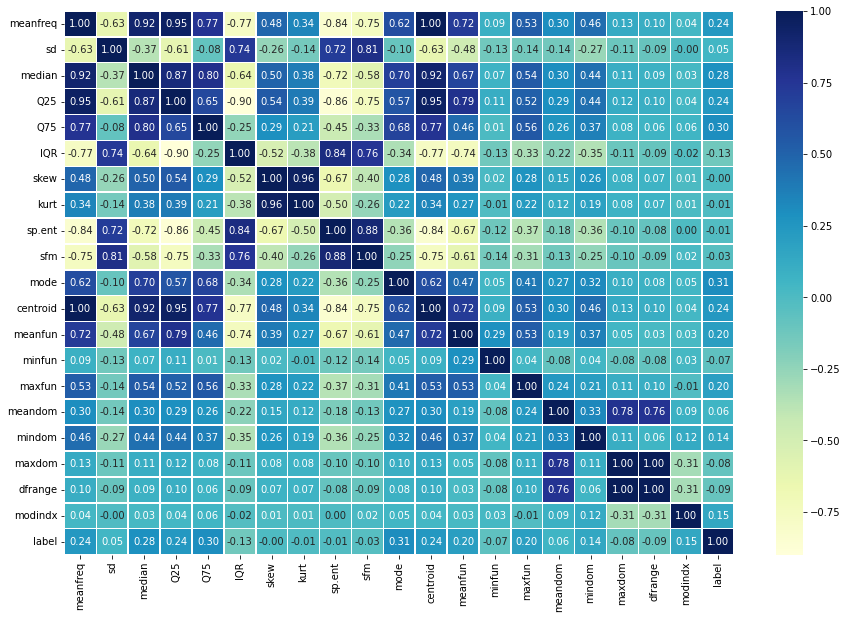

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model_acc = []

In [ ]:
svm_c = 1000
svm_gamma = 0.01

dtc_md = 4

rfc_M = 14
rfc_d = 8
rfc_m = 16

In [ ]:
SVM_model = SVC(C=svm_c, gamma=svm_gamma).fit(X_train, y_train)
train_acc = SVM_model.score(X_train, y_train)
test_acc = SVM_model.score(X_test, y_test)
m = 'SVM'
model_acc.append([m, train_acc, test_acc])

In [ ]:
RFC_model = RandomForestClassifier(n_estimators=rfc_M, max_features=rfc_d, max_depth=rfc_m, random_state=0).fit(X_train, y_train)
train_acc = RFC_model.score(X_train, y_train)
test_acc = RFC_model.score(X_test, y_test)
m = 'Random Forest Classifier'
model_acc.append([m, train_acc, test_acc])

In [ ]:
DTC_model = DecisionTreeClassifier(max_depth=dtc_md).fit(X_train, y_train)
train_acc = DTC_model.score(X_train, y_train)
test_acc = DTC_model.score(X_test, y_test)
m = 'Decision Tree Classifier'
model_acc.append([m, train_acc, test_acc])

In [ ]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
logmodel = LogisticRegression(solver='liblinear')
train_acc=logmodel.fit(X_train,y_train)
test_acc=logmodel.score(X_train,y_train)
m = 'Logistic Regression'
model_acc.append([m, train_acc, test_acc])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #knn
knn = KNeighborsClassifier(n_neighbors=15 )
train_acc=knn.fit(X_train,y_train)
test_acc=knn.score(X_train,y_train)
m = 'Knn Neighbours'
model_acc.append([m, train_acc, test_acc])

In [ ]:
from sklearn.naive_bayes import GaussianNB #naive bayes
nb = GaussianNB()
train_acc=nb.fit(X_train,y_train)
test_acc=nb.score(X_train,y_train)
m = 'Gaussian Classifiers'
model_acc.append([m, train_acc, test_acc])

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D

In [ ]:
df = tf.keras.datasets.fashion_mnist
(train_df,train_labl),(test_df,test_labl) = df.load_data()

In [ ]:
train_df=train_df/255.0
test_df = test_df/255.0

In [ ]:
train_df[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
train_df = train_df.reshape(len(train_df),28,28,1)
test_df = test_df.reshape(len(test_df),28,28,1)
def build_model(hp):
    model = keras.Sequential([ 
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)),keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ), keras.layers.Flatten(),   
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),   
    keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kerastuner import RandomSearch
#creating randomsearch object
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                    max_trials = 5)
# search best parameter
tuner.search(train_df,train_labl,epochs=3,validation_data=(train_df,train_labl))

Trial 5 Complete [00h 09m 23s]
val_accuracy: 0.9300000071525574

Best val_accuracy So Far: 0.9432166814804077
Total elapsed time: 00h 58m 32s


In [ ]:
model=tuner.get_best_models(num_models=1)[0]
#summary of best model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 48)        27696     
                                                                 
 flatten (Flatten)           (None, 27648)             0         
                                                                 
 dense (Dense)               (None, 32)                884768    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 913,434
Trainable params: 913,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(test_df,test_labl,
          epochs=10,
          validation_split=0.1,initial_epoch=3)

Epoch 4/10
282/282 [==============================] - 45s 157ms/step - loss: 0.2541 - accuracy: 0.9086 - val_loss: 0.2410 - val_accuracy: 0.9060
Epoch 5/10
282/282 [==============================] - 28s 100ms/step - loss: 0.1630 - accuracy: 0.9426 - val_loss: 0.2379 - val_accuracy: 0.9140
Epoch 6/10
282/282 [==============================] - 28s 100ms/step - loss: 0.1003 - accuracy: 0.9668 - val_loss: 0.2657 - val_accuracy: 0.9150
Epoch 7/10
282/282 [==============================] - 30s 106ms/step - loss: 0.0592 - accuracy: 0.9797 - val_loss: 0.3343 - val_accuracy: 0.9020
Epoch 8/10
282/282 [==============================] - 30s 107ms/step - loss: 0.0370 - accuracy: 0.9900 - val_loss: 0.3505 - val_accuracy: 0.9120
Epoch 9/10
282/282 [==============================] - 28s 100ms/step - loss: 0.0168 - accuracy: 0.9963 - val_loss: 0.3846 - val_accuracy: 0.9070
Epoch 10/10
282/282 [==============================] - 28s 100ms/step - loss: 0.0101 - accuracy: 0.9981 - val_loss: 0.4490 - val_a

In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(DTC_model.feature_importances_)]).T

Feature importance: 


array([['meanfreq', '0.0'],
       ['sd', '0.021604086622251634'],
       ['median', '0.0'],
       ['Q25', '0.21352940476075918'],
       ['Q75', '0.12135263076366706'],
       ['IQR', '0.0'],
       ['skew', '0.026165465857987884'],
       ['kurt', '0.0'],
       ['sp.ent', '0.2053366232048967'],
       ['sfm', '0.10188095424229361'],
       ['mode', '0.08865775579656465'],
       ['centroid', '0.0'],
       ['meanfun', '0.0'],
       ['minfun', '0.0'],
       ['maxfun', '0.011992505184911116'],
       ['meandom', '0.20948057356666822'],
       ['mindom', '0.0'],
       ['maxdom', '0.0'],
       ['dfrange', '0.0'],
       ['modindx', '0.0']], dtype='<U32')

In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(RFC_model.feature_importances_)]).T

Feature importance: 


array([['meanfreq', '0.030460660042063777'],
       ['sd', '0.05328335737272206'],
       ['median', '0.04505902048391497'],
       ['Q25', '0.05372329226799229'],
       ['Q75', '0.053589645989000734'],
       ['IQR', '0.059852040863398646'],
       ['skew', '0.04155874042265135'],
       ['kurt', '0.028523027845753973'],
       ['sp.ent', '0.06433139380337508'],
       ['sfm', '0.05285615580725091'],
       ['mode', '0.07421937506610501'],
       ['centroid', '0.03530306214751998'],
       ['meanfun', '0.062490585989443445'],
       ['minfun', '0.0550164488880298'],
       ['maxfun', '0.017580738688025798'],
       ['meandom', '0.09878027187835248'],
       ['mindom', '0.028695315709203674'],
       ['maxdom', '0.04196981431061111'],
       ['dfrange', '0.045125754349181084'],
       ['modindx', '0.057581298075403936']], dtype='<U32')

In [ ]:
result = pd.DataFrame(model_acc, columns=['Model', 'Training Accuracy', 'Validation Accuracy'])
result[['Model', 'Training Accuracy', 'Validation Accuracy']]

,Model,Training Accuracy,Validation Accuracy
0,SVM,0.681351,0.504386
1,Random Forest Classifier,0.994126,0.561404
2,Decision Tree Classifier,0.64464,0.486842
3,Logistic Regression,LogisticRegression(solver='liblinear'),0.543319
4,Knn Neighbours,KNeighborsClassifier(n_neighbors=15),0.515419
5,Gaussian Classifiers,GaussianNB(),0.493392
